In [1]:
%run PyTorTractor.py

# Generating Wick Diagrams

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 1 diagrams
 
**********************************************
 
 
********
0 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -1
Topology: 
[[[1, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0]]]


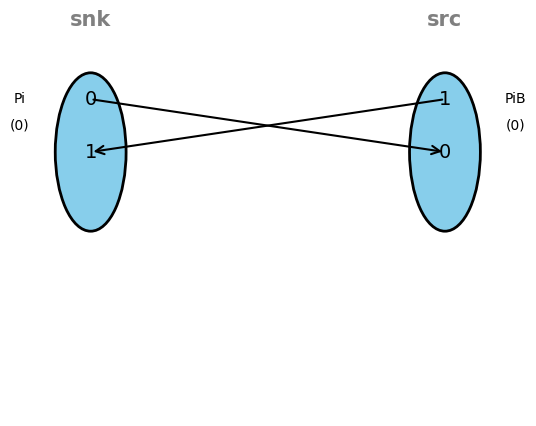

In [2]:
O1 = Pion(1)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'PyTor_Test_N.hdf5')
tcmpr = []
for res in Result:
    a = res.bulavision()
    tcmpr.append(np.array(a))

# Defining the participating Hadrons

In [3]:
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'Hg_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'Hg_1', Displacement = 'SS_0')

Hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron5 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,2), Flavor = 'isovector_du',
          Momentum = 'mom_ray_000', LGIrrep = 'A1gm_1', Displacement = 'SS_0')
Hadron6 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,2), Flavor = 'isovector_du',
          Momentum = 'mom_ray_000', LGIrrep = 'A1gm_1', Displacement = 'SS_0')
hadrons = [Hadron3, Hadron4]

# Initializing the PyTorch tensors corresponding to Perambulators, ModeDoublets and/or Triplets

In [4]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['M_Tests/light_quark_perambulator_quda_5.hdf5'],#['data/p_snk0_src4.h5', 'data/p_src0_snk3_final.h5', 'data/snk4_src4.h5', 'data/p_snk1_src0.h5'], 
                                         Device = device, Double_Reading = True, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'M_Tests/mode_doublets_5.hdf5', Device = device, cplx128 = complex128)
#modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1.hdf5', Device = device, cplx128 = complex128)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed


# Performing the tensor contractions

In [5]:
test0            = PyCorrTorch(SinkTime = 4, SourceTime = 0, 
                               Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_N.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
print(test0_contracted)
final_result = combine_all(test0_contracted)

Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Insert now these combinations explicitly into the the clusters!
all_momdis_info:  ('1D_px0_py0_pz0_ddir0', '0D_px0_py0_pz0_ddir0')
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
One ModeDoublet/Triplet for a spin combination
0
([((((1, 0), (0, 0)), (0,)), tensor(-78.1372-2.8235e-17j, dtype=torch.complex128))], [np.int64(-1)])


In [6]:
final_result

(78.13719804676475+2.823539653851676e-17j)